# <center>Value at Risk : VaR & Expected Shortfall : ES</center>

The Value at Risk is a simple model to evaluate the risk of a portfolio. 
VaR is used to determine the maximum loss of a portfolio over a given period with a given probability.

$$\text{X a loss}: VaR_\alpha(X)=F_X^{-1}(\alpha)$$

$$\text{X a gain}: VaR_\alpha(X)=-F_X^{-1}(1-\alpha)$$

If the VaR of a portfolio with a 10 day horizon is 1000€ with a confidence interval of 95%, it means that over the next 10 days, there is a 95% chance that the portfolio will never lose more than 1000€.  
We assume that our returns follow a Gaussian normal distribution.  
Historical VaR : based directly on past values. 

In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

#Data recovery and conversion
def Openfile(file):
    f=open(file,'r')
    l=[]
    for line in f:
        currentline=line.split()
        l.append([currentline[0],float(currentline[1].replace(',','.'))])
    f.close()
    return l


#Calculation of returns
def rendement(l):
    rend=[]
    for i in range(len(l)):
        if(i==0): rend.append(0.0)
        else: rend.append((l[i][1]-l[i-1][1])/l[i-1][1])
    return rend
    

#Value at risk calculation
def VaR_empirique(rend,alpha):
   rendsorted=sorted(rend)
   return np.quantile(rendsorted, q=alpha) 


def VaR_gauss(rend,alpha):
    z=st.norm.ppf(alpha)
    return np.mean(rend)+z*np.sqrt(np.var(rend)) 

def VaR_kernel(rend,alpha): 
    kde=st.gaussian_kde(rend)
    sample=kde.resample(size=513)
    return np.quantile(sample,alpha)
  

In [21]:
#Main
l=Openfile('NatixisStock.txt')  #open file
rend=rendement(l)  #calculation of returns

#Empirical VaR
#For 95% confidence, VaR is the lowest 5% of returns. 
#Drawback : Does not react well to extreme values, large events (black swans) like stock market booms and crashes.
VaR_95_empirique=VaR_empirique(rend,0.05) 
VaR_99_empirique=VaR_empirique(rend,0.01) 
print("VaR 99% Empirique :",VaR_99_empirique)
print("VaR 95% Empirique :",VaR_95_empirique)


#Parametric Gaussian VaR
#Drawback : The Parametric model doesn’t reflect well what happens at the tails (au niveau des queues) 
#because the Gaussian distribution has very thin tails and that's not what actual return distribution looks like.
VaR_95_gauss=VaR_gauss(rend,0.05) 
VaR_99_gauss=VaR_gauss(rend,0.01) 
print("VaR 99% Gauss:",VaR_99_gauss) 
print("VaR 95% Gauss:",VaR_95_gauss) 

#Non-Parametric Kernel VaR
VaR_95_kernel=VaR_kernel(rend,0.05)
VaR_99_kernel=VaR_kernel(rend,0.01)
print("VaR 99% Kernel :",VaR_99_kernel)
print("VaR 95% Kernel :",VaR_95_kernel)


VaR 99% Empirique : -0.05378147466007381
VaR 95% Empirique : -0.03173868176646475
VaR 99% Gauss: -0.04724234754036476
VaR 95% Gauss: -0.03343127000613611
VaR 99% Kernel : -0.055753334232596645
VaR 95% Kernel : -0.027912751299641995


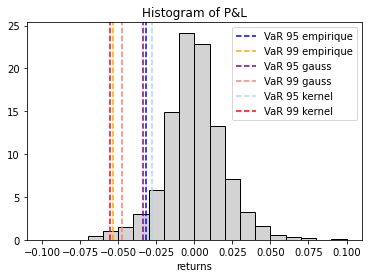

In [22]:
#Plot
plt.hist(rend,range=(-0.10,0.10),color="lightgrey", edgecolor = 'black',density = True,bins = 20)
plt.xlabel('returns')
plt.title('Histogram of P&L')
plt.axvline(x=VaR_95_empirique, color='blue',linestyle='--', label='VaR 95 empirique')
plt.axvline(x=VaR_99_empirique, color='orange',linestyle='--', label='VaR 99 empirique')
plt.axvline(x=VaR_95_gauss, color='purple',linestyle='--', label='VaR 95 gauss')
plt.axvline(x=VaR_99_gauss, color='salmon',linestyle='--', label='VaR 99 gauss')
plt.axvline(x=VaR_95_kernel, color='lightblue',linestyle='--', label='VaR 95 kernel')
plt.axvline(x=VaR_99_kernel, color='red',linestyle='--', label='VaR 99 kernel')
plt.legend()
plt.show()

The limits of VaR:  
-VaR does not give any indication of the potential size of the loss above it, so the tails of the distribution are often poorly evaluated.    
-VAR is based on the study of the past to predict the future evolution of prices. However, past performance does not guarantee future performance.   
-VaR is not a coherent risk measure because it is not sub-additive
 
This is why we introduced the Expected Shortfall which represents the average loss above the Var.  
This is the measure that is now recommended by the FRTB.

$$\text{X a loss}: ES_\alpha(X)=\frac{1}{1-\alpha}\int_{\alpha}^{1} VaR_\beta(X)  d\beta=\frac{1}{1-\alpha}\int_{\alpha}^{1}F_X^{-1}(\beta) d\beta$$

$$\text{X a gain}: ES_\alpha(X)=\frac{1}{1-\alpha}\int_{\alpha}^{1} VaR_\beta(X)  d\beta=\frac{1}{1-\alpha}\int_{\alpha}^{1}-F_X^{-1}(1-\beta) d\beta$$

In [8]:
#Expected shortfall : empirical VaR
def CVaR(rend,alpha): 
    return np.mean([x for x in rend if x<=VaR_empirique(rend,alpha)])

In [11]:
#Main
VaR_95_empirique=VaR_empirique(rend,0.05) 
print("VaR 95% :",VaR_95_empirique)

ES_95=CVaR(rend,0.05) 
print("ES 95% : ",ES_95)

VaR 95% : -0.03173868176646475
ES 95% :  -0.04624367789487057


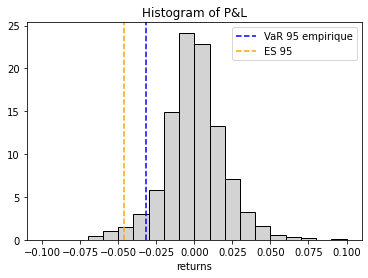

In [12]:
#Plot
plt.hist(rend,range=(-0.10,0.10),color="lightgrey", edgecolor = 'black',density = True,bins = 20)
plt.xlabel('returns')
plt.title('Histogram of P&L')
plt.axvline(x=VaR_95_empirique, color='blue',linestyle='--', label='VaR 95 empirique')
plt.axvline(x=ES_95, color='orange',linestyle='--', label='ES 95')
plt.legend()
plt.show()